In [1]:
%matplotlib notebook

In [3]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3

from gf321_utils import bvh_utils
from gf321_utils import marker_utils
from gf321_utils import plot_utils

In [5]:
skel_data = bvh_utils.BVHData()
skel_data.bvhRead('neural_lbs_data/dog1_trot_skeleton.bvh')
joints_raw, joint_names = skel_data.getJointAngles(withNames=True)

Reading BVH File.. neural_lbs_data/dog1_trot_skeleton.bvh
Done


In [6]:
markers_raw = marker_utils.read_markers('neural_lbs_data/dog1_trot_markers.json')
markers_raw.shape

Reading JSON File.. neural_lbs_data/dog1_trot_markers.json
Done


(146, 64, 3)

In [29]:
all_joint_tfs = bvh_utils.local_tfs_each_joint(joints_raw)
markers_ex = np.zeros((markers_raw.shape[0],markers_raw.shape[1],4))
markers_ex[:,:,:-1] = markers_raw
markers_ex[:,:,3] = 1
np.matmul(all_joint_tfs[9,0], markers_ex[9,0])

array([-284.04439015,   51.59597415,  587.6005443 ,    1.        ])

minmaxs are:  -1751.546717591272 -1164.0465550030353 -237.9431586288901 764.9403295767495 10.96127467430216 825.5351101471231


<IPython.core.display.Javascript object>


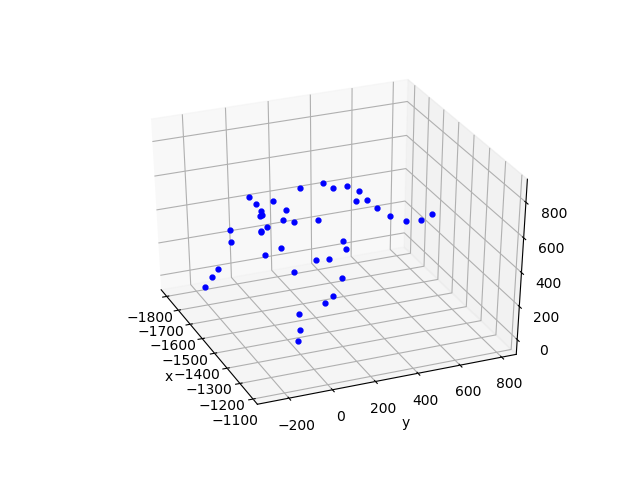

In [11]:
plot_utils.plot(joints_raw[:,:,:,3],0)

In [6]:
marker_offsets.shape

(146, 64, 43, 3)

In [14]:
all_joint_tfs = bvh_utils.local_tfs_each_joint(joints_raw)
marker_offsets = marker_utils.create_marker_offsets(markers_raw,all_joint_tfs,mean=False)
mean_offsets = marker_utils.create_marker_offsets(markers_raw,all_joint_tfs)

In [21]:
all_joint_tfs.shape

(146, 43, 4, 4)

In [22]:
marker_offsets[:,:,0].shape

(146, 64, 3)

In [5]:
local_tfs = bvh_utils.create_local_tfs(joints_raw)

In [6]:
markers_local = marker_utils.make_markers_local(markers_raw, local_tfs)

In [7]:
markers_local

NameError: name 'markers_local' is not defined

In [5]:
root_raw = joints_raw[:,0]

In [6]:
root_raw[0]

array([[-9.67914161e-01, -2.39599808e-01,  7.57239049e-02,
        -1.64358000e+03],
       [-2.23746037e-01,  9.58942901e-01,  1.74259067e-01,
         5.76536000e+02],
       [-1.14367340e-01,  1.51724895e-01, -9.81783921e-01,
         3.28814000e+02]])

In [7]:
test_4b4 = np.reshape(np.append(root_raw[0],np.array([0,0,0,1])),(4,4))

In [8]:
test_4b4_inv = np.linalg.inv(test_4b4)

In [9]:
root_og_pos = root_raw[0][:,-1]

In [10]:
root_og_pos_1 = np.append(root_og_pos,[1])

In [11]:
np.matmul(test_4b4_inv,root_og_pos_1)

array([0.00000000e+00, 1.70530257e-13, 0.00000000e+00, 1.00000000e+00])

In [54]:
marker_offsets[1]

array([[[ -348.77314863,    24.51149941,   537.95255315],
        [ -242.90998904,   196.12260854,   448.92504151],
        [ -173.46811861,   226.54218962,   299.29298647],
        ...,
        [ -978.70442211,  -131.03000991,   165.68938625],
        [-1004.97815735,  -138.51629937,    -2.77450509],
        [-1004.97815735,  -138.51629937,    64.22549491]],

       [[  158.74825886,  -394.99125736,  -250.47432435],
        [   46.26109639,  -480.36408272,  -267.95941436],
        [  -60.87498922,  -539.1323505 ,  -376.16446518],
        ...,
        [   39.4254497 ,   -87.16147353,   294.78082213],
        [  -61.43418528,    26.71932461,   368.16948595],
        [  -61.43418528,    26.71932461,   435.16948595]],

       [[  184.32438962,  -437.45458008,   382.75513269],
        [  209.42061124,  -354.9089165 ,   332.93724189],
        [  228.22478784,  -357.1918587 ,   159.33137407],
        ...,
        [ -460.74635331,  -230.09950735,   659.24440532],
        [ -642.45974815,   -4

In [5]:
joints_local = bvh_utils.make_joints_local(joints_raw)

In [11]:
#joint_pos = get_joint_pos(joints_local)
joint_pos = bvh_utils.get_joint_pos(joints_local)

In [8]:
bvh_utils.create_local_tfs_root(joints_raw)

array([[[-9.67914161e-01, -2.23746037e-01, -1.14367340e-01,
         -1.42424113e+03],
        [-2.39599808e-01,  9.58942901e-01,  1.51724895e-01,
         -9.96555827e+02],
        [ 7.57239049e-02,  1.74259067e-01, -9.81783921e-01,
          3.46815968e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]],

       [[-9.65963518e-01, -2.07084756e-01, -1.55017371e-01,
         -1.41201528e+03],
        [-2.28496078e-01,  9.63990793e-01,  1.36056213e-01,
         -9.74912142e+02],
        [ 1.21260151e-01,  1.66846200e-01, -9.78497993e-01,
          4.19850674e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]],

       [[-9.61421107e-01, -1.94134945e-01, -1.94887346e-01,
         -1.39391308e+03],
        [-2.19776262e-01,  9.68170050e-01,  1.19771233e-01,
         -9.56525142e+02],
        [ 1.65432310e-01,  1.57982204e-01, -9.73485374e-01,
          4.89692848e+02],
        [ 0.00000000e+00,  0.00000000e+

(146, 64, 43, 3)


<IPython.core.display.Javascript object>


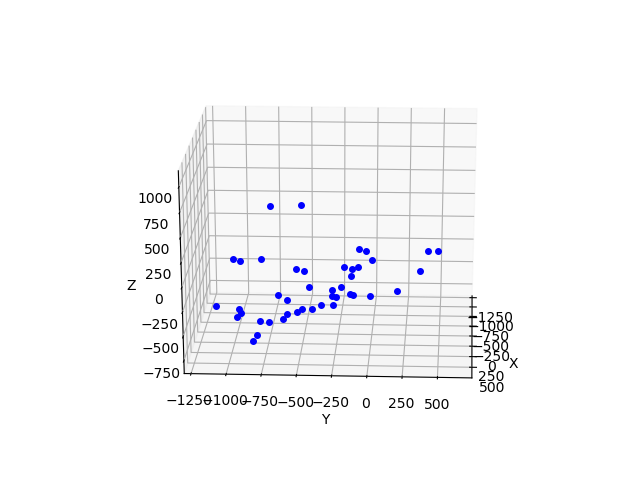

In [35]:
print(marker_offsets.shape)
ani3 = plot_utils.AnimatePlot()
ani3.animated_plot(marker_offsets[:,1])

<IPython.core.display.Javascript object>


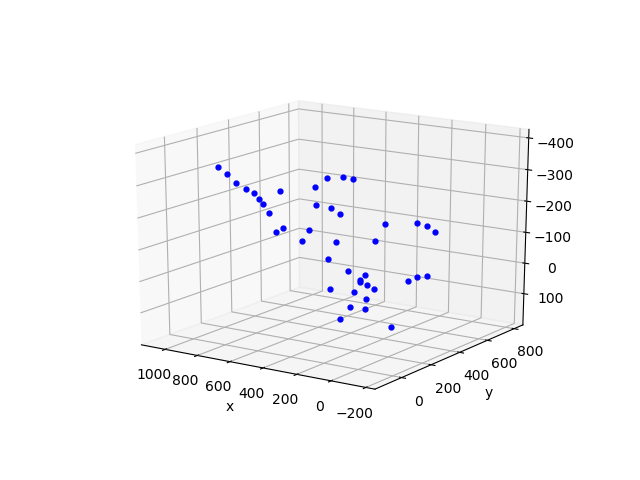

In [22]:
plot(mean_offsets[0],0,no_frames=True)

<IPython.core.display.Javascript object>


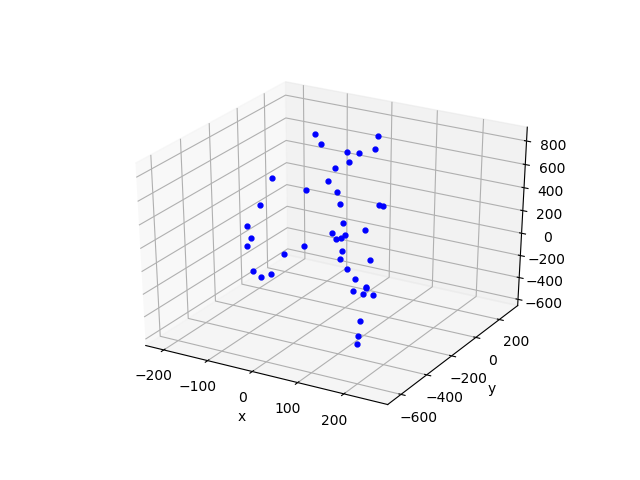

In [19]:
bvh_utils.plot(joint_pos,90)

In [11]:
joints_raw.shape

(146, 43, 3, 4)

136.05540161411307

In [6]:
marker_offsets.std(axis=0).shape

(64, 43, 3)

<IPython.core.display.Javascript object>


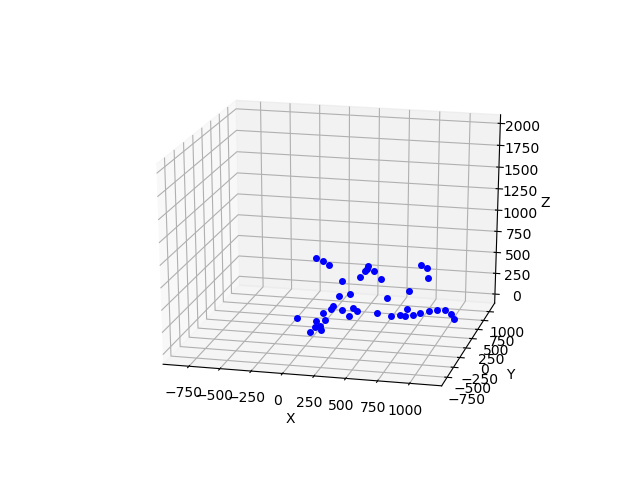

In [62]:
anim = plot_utils.AnimatePlot()
anim.animated_plot(marker_offsets[:,0,:])

In [73]:
a = np.array([[1,2],[3,4]])
b = np.array(a)
b[:,0] = -b[:,0]
b

array([[-1,  2],
       [-3,  4]])

<IPython.core.display.Javascript object>


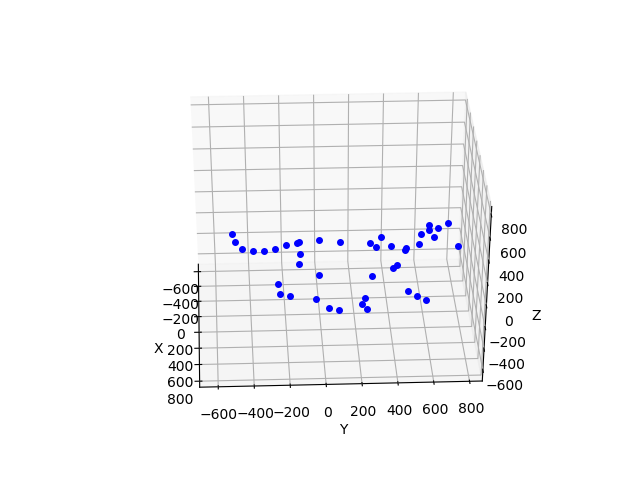

In [118]:
joints_raw[:,:,:,0] = -joints_raw[:,:,:,0]

joints_local = bvh_utils.make_joints_local(joints_raw)
joint_pos = bvh_utils.get_joint_pos(joints_local)
local_tfs = bvh_utils.create_local_tfs_root(joints_raw)
markers_local = marker_utils.make_markers_local(markers_raw,local_tfs)
anim2 = plot_utils.AnimatePlot()
anim2.animated_plot(joint_pos)

<IPython.core.display.Javascript object>


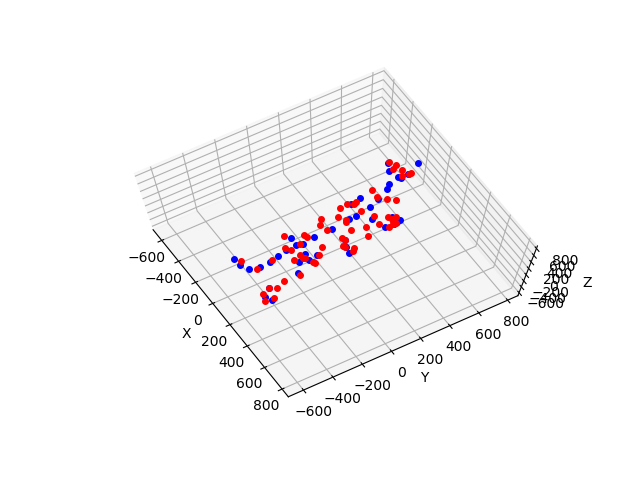

In [75]:
joints_local = bvh_utils.make_joints_local(joints_raw)
joint_pos = bvh_utils.get_joint_pos(joints_local)
local_tfs = bvh_utils.create_local_tfs_root(joints_raw)
markers_local = marker_utils.make_markers_local(markers_raw,local_tfs)
anim2 = plot_utils.AnimatePlot()
anim2.animated_plot(joint_pos,markers_local)